In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

RAW_TRAIN_DATA_PATH = 'rag-dataset-12000/data/train-00000-of-00001-9df3a936e1f63191.parquet'
RAW_TEST_DATA_PATH = 'rag-dataset-12000/data/test-00000-of-00001-af2a9f454ad1b8a3.parquet'

In [21]:
df = pd.read_parquet(RAW_TRAIN_DATA_PATH)
df.head(2)

,context,question,answer
0,Caption: Tasmanian berry grower Nic Hansen sho...,What is the Berry Export Summary 2028 and what...,The Berry Export Summary 2028 is a dedicated e...
1,RWSN Collaborations\nSouthern Africa Self-supp...,What are some of the benefits reported from ha...,Benefits reported from having access to Self-s...


In [6]:
len(df)

9600

In [7]:
test_df = pd.read_parquet(RAW_TEST_DATA_PATH)
len(test_df)

2400

In [13]:
# Avgerage Context Length
context_lengths = df['context'].str.len()
print(f'Average Context Length: {context_lengths.mean()}')

# Max Context Length
context_lengths = df['context'].str.len()
print(f'Max Context Length: {context_lengths.max()}')

Average Context Length: 3438.21125
Max Context Length: 9156


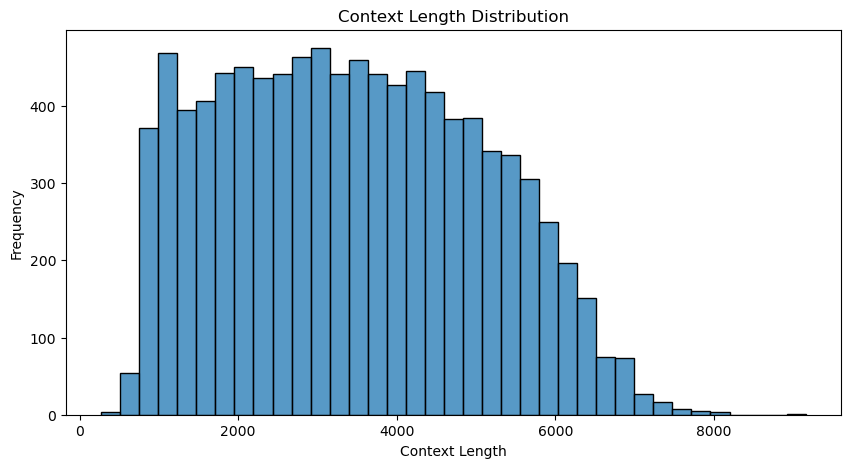

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(context_lengths, ax=ax)
ax.set_title('Context Length Distribution')
ax.set_xlabel('Context Length')
ax.set_ylabel('Frequency')
plt.show()

In [8]:
# Avgerage Question Length
question_lengths = df['question'].str.len()
print(f'Average Question Length: {question_lengths.mean()}')

# Max Question Length
question_lengths = df['question'].str.len()
print(f'Max Question Length: {question_lengths.max()}')

Average Question Length: 79.01375286518025
Max Question Length: 322.0


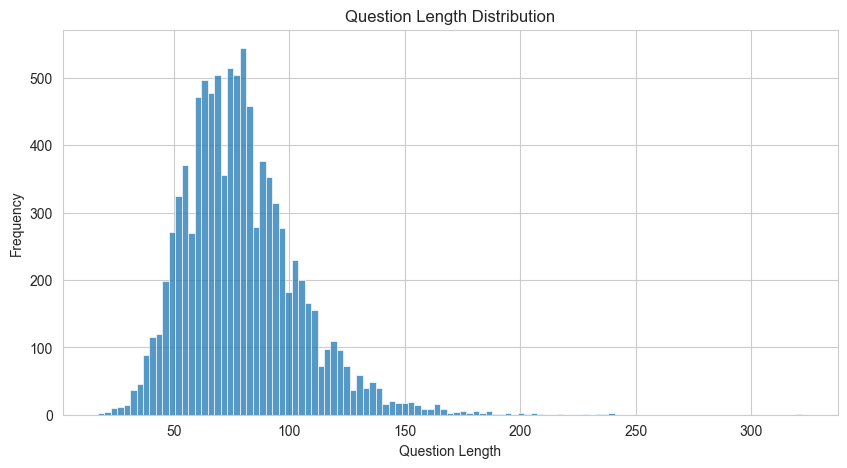

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(question_lengths, ax=ax)
ax.set_title('Question Length Distribution')
ax.set_xlabel('Question Length')
ax.set_ylabel('Frequency')
plt.show()

In [32]:
# Frequency of the first question words

frequency_of_first_words = df['question'].apply(lambda x: x.split()[0] if x and not x.isspace() else None).value_counts()

In [34]:
frequency_of_first_words

question
What      7190
Who       1568
How        284
Why        220
When       166
Where       68
Which       52
Can         19
Does        12
Is           6
Do           5
Should       1
Was          1
Will         1
Under        1
Are          1
Since        1
At           1
Whose        1
Name: count, dtype: int64

In [13]:
# Avgerage Answer Length
answer_lengths = df['answer'].str.len()
print(f'Average Answer Length: {answer_lengths.mean()}')

# Max Answer Length
answer_lengths = df['answer'].str.len()
print(f'Max Answer Length: {answer_lengths.max()}')

Average Answer Length: 237.34923942488018
Max Answer Length: 2408.0


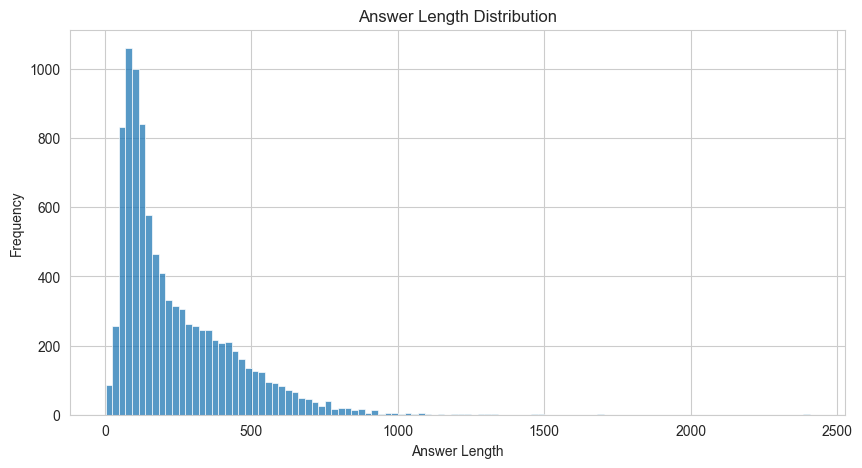

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(answer_lengths, ax=ax)
ax.set_title('Answer Length Distribution')
ax.set_xlabel('Answer Length')
ax.set_ylabel('Frequency')
plt.show()

## Spot check 25 query and response pairs

In [17]:
np.random.seed(0)
df.loc[np.random.randint(0, len(df), size=25), ].to_excel('sample_data.xlsx', index=False)

In [21]:
df.to_csv('train_data.csv')